#              Feature Engineering Techniques





In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


### Load Dataset

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
df["PricePerRoom"] = df["MedHouseVal"] / df["AveRooms"]


In [4]:
df["RoomsPerHousehold"] = df["AveRooms"] / df["AveOccup"]


In [5]:
df["BedroomRatio"] = df["AveBedrms"] / df["AveRooms"]


# Feature Engineering

## 1. House Age

In [6]:
df["HouseAge"].head()


0    41.0
1    21.0
2    52.0
3    52.0
4    52.0
Name: HouseAge, dtype: float64

## 2. Price per Square Foot

In [7]:
df["PricePerRoom"] = df["MedHouseVal"] / df["AveRooms"]


### Selecting Useful Features

In [8]:
df["Neighborhood"] = pd.cut(
    df["Latitude"],
    bins=3,
    labels=["South", "Central", "North"]
)


In [9]:
df["Condition"] = pd.cut(
    df["HouseAge"],
    bins=[0, 20, 50, 100],
    labels=["New", "Moderate", "Old"]
)


## 3. Encode Categorical Features

In [10]:
df_encoded = pd.get_dummies(
    df,
    columns=["Neighborhood", "Condition"],
    drop_first=True
)


In [11]:
features = [
    "MedInc",
    "HouseAge",
    "AveRooms",
    "AveBedrms",
    "AveOccup",
    "Latitude",
    "Longitude",
    "PricePerRoom",
    "RoomsPerHousehold",
    "BedroomRatio",
    "Neighborhood_Central",
    "Neighborhood_North",
    "Condition_Moderate",
    "Condition_Old"
]

X = df_encoded[features]
y = df_encoded["MedHouseVal"]


### Train-Test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## 4. Feature Importance using Linear Regression

### Training Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

### Analyzing Feature Importance

In [15]:
lr_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": lr.coef_
}).sort_values(by="Importance", ascending=False)

lr_importance.head(10)


,Feature,Importance
7,PricePerRoom,4.063283
0,MedInc,0.146511
11,Neighborhood_North,0.109406
13,Condition_Old,0.052233
2,AveRooms,0.038747
8,RoomsPerHousehold,0.033746
3,AveBedrms,0.028472
10,Neighborhood_Central,0.016972
1,HouseAge,0.001793
4,AveOccup,-0.000646


### Visualization

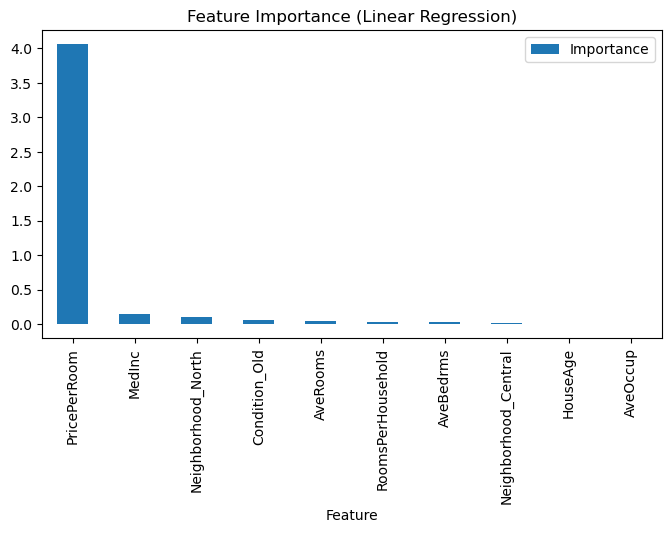

In [16]:
lr_importance.head(10).plot(
    x="Feature", y="Importance", kind="bar", figsize=(8,4)
)
plt.title("Feature Importance (Linear Regression)")
plt.show()
